In [1]:
#DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
DATA_PATH = 'C:/Users/amityu/Gel_Drop_DATA/'
movie = 'for yuval/'
#DATA_PATH ='D:/amityu/backoffice_data/'

#movie ='130721_CCA60_RAW'
#movie ='280523 AM100 568'
#movie = 'control_2_230523'
#movie ='cca120_am200'
#movie ='280523 AM100 568_1'
#movie = 'control_1_050721'
#movie = 'cca40'
#movie = 'cca60_dist'
#movie ='cca300'
MOVIE_PATH = DATA_PATH +movie +'/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import preprocessing
import importlib
from tifffile import imread, imsave, imwrite



In [17]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r')
gel_t = np.load(MOVIE_PATH + 'np/channel2_transformed.npy', mmap_mode='r')


#mean = np.load(MOVIE_PATH + 'np/mean.npy', mmap_mode='r')
#mask = np.load(MOVIE_PATH + 'np/mask.np    y', mmap_mode='r')


In [10]:
gel._mmap.close()


In [18]:
image = imread(MOVIE_PATH + '20120913 exp3 x2_5 stream00972.tif')
#image_series = imread(r'C:\Users\amityu\Downloads\1-1c.tif')

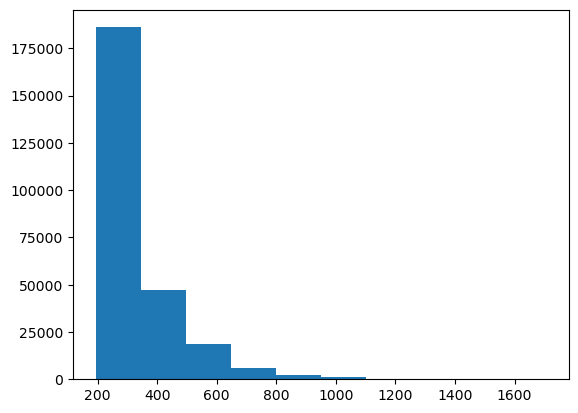

In [5]:
plt.hist(image.flatten())
plt.show()

In [32]:
image2= image.copy()


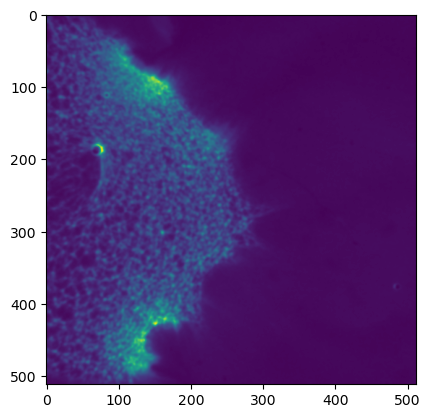

In [35]:
image_blur = gaussian(image2, sigma =1)

plt.imshow(image_blur)
plt.show()

In [21]:
image16 = image2 / 65535  # To bring the pixel values between 0 and 1

# Convert the 16-bit float image to an 8-bit image
image8 = (image16 * 255).astype(np.uint8)

In [36]:
imwrite(DATA_PATH + 'tmp/image_blur.tif', image_blur)


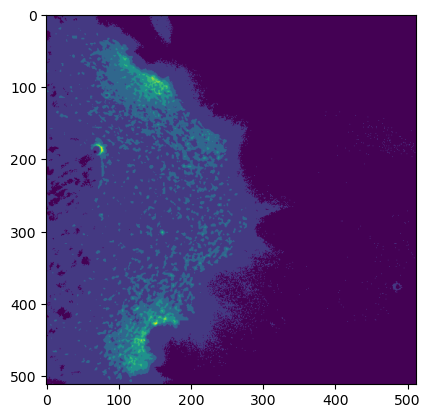

In [24]:
plt.imshow(image8)
plt.show()

In [8]:
flipped_image = 2**16 - image
imwrite(DATA_PATH + 'flipped.tif', flipped_image)

C:\Users\amityu\AppData\Local\miniforge3\envs\micro-sam\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


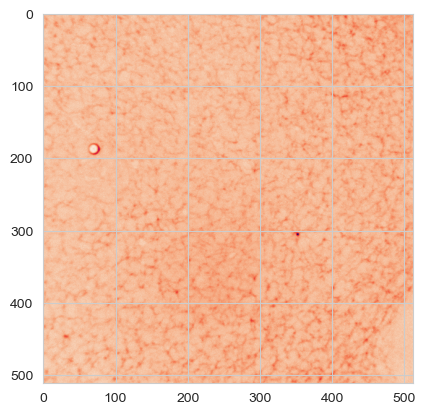

In [5]:
plt.imshow(flipped_image)


In [7]:
for t in range(len(image_series)):
    imsave(r'C:\Users\amityu\Downloads\series\c1%s.tif'%t, image_series[t])

In [29]:
del gel_t, gel

In [39]:
import napari
import vollseg_napari_trackmate
viewer = napari.Viewer()
#image =gel[:,:,:, 200].copy()
#image =mean

#viewer.add_image(image, name='vas5')
#napari.utils.nbscreenshot(viewer)

In [3]:
image = imread(r'C:\Users\amityu\Downloads\1-1frame5.tif')
import napari
# Check the shape of the loaded images

# Assuming the second dimension represents channels, select the first channel
# If it's Z-stacks, select the appropriate plane instead
#images_2d = images[:5, 0, :, :].squeeze()  # Now the shape should be (5, 800, 828)
img_series = imread(r'C:\Users\amityu\Downloads\1-1.tif')

# Initialize Napari viewer
viewer = napari.Viewer()

# Add the 2D images to the viewer
viewer.add_image(img_series, name='Images')

# Start the Napari event loop
napari.run()